In [149]:
#House Prices
#https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
#Author - Nick Bohall
#Date - 8/14/20

In [150]:
#Packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from itertools import chain
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [151]:
df_train = pd.read_csv('Z:\\Coding\\Myproj\\Kaggle\\Housing Prices\\train.csv')

In [152]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [153]:
#Analyzing SalePrice
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

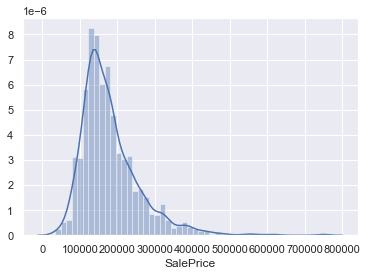

In [154]:
#histogram
sns.distplot(df_train['SalePrice']);

In [155]:
#skewness and kurtosis
print('Skewness: %f' % df_train['SalePrice'].skew())
print('Kurtosis: %f' % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


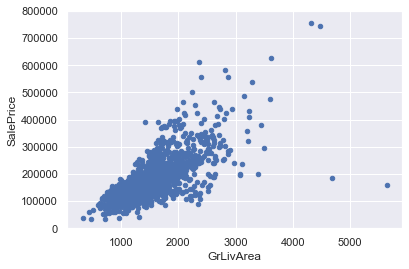

In [156]:
#example scatter plot
var = 'GrLivArea'
data = pd.concat([df_train.SalePrice, df_train[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [157]:
#This is taking the float and int columns and creating a new df in order to make the scatters b/c you can't scatter a str
df_float = df_train.loc[:, df_train.dtypes == np.float64]
df_int = df_train.loc[:, df_train.dtypes == np.int64]
df_num = pd.concat([df_float, df_int], axis = 1)

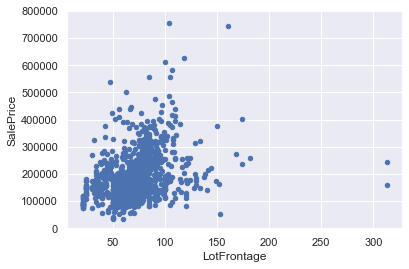

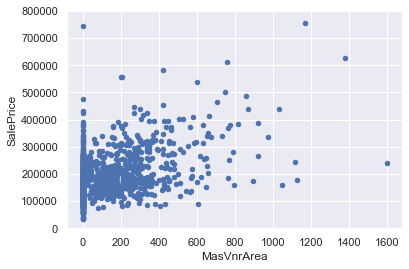

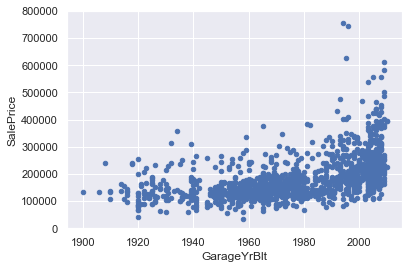

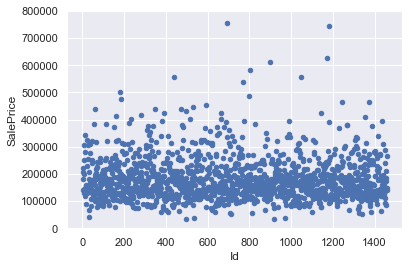

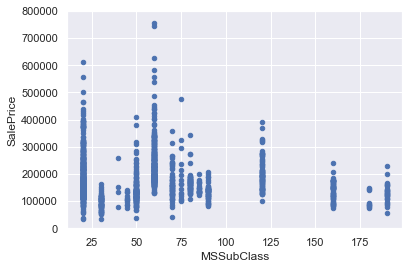

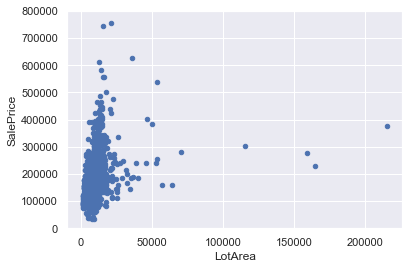

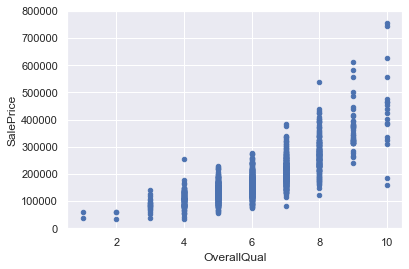

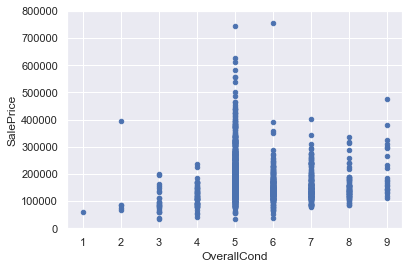

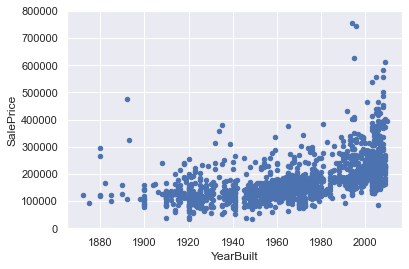

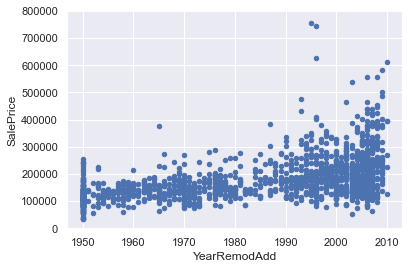

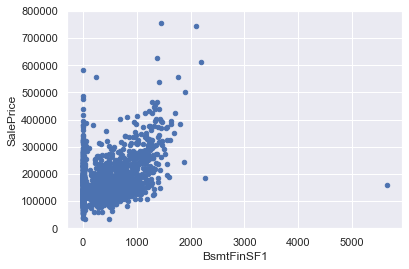

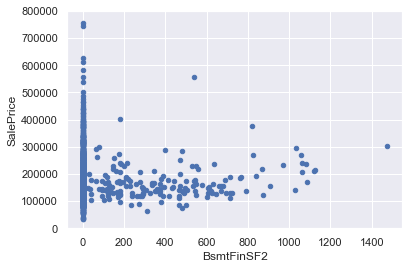

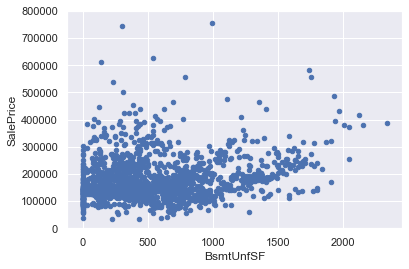

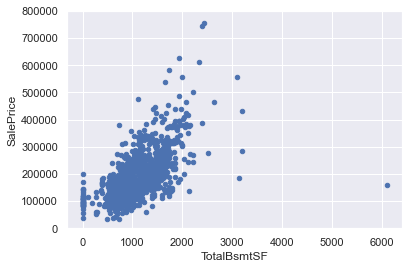

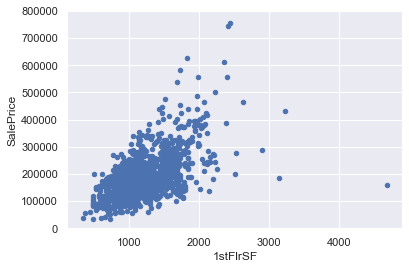

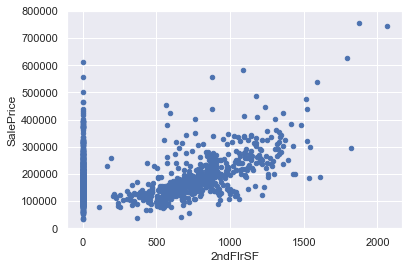

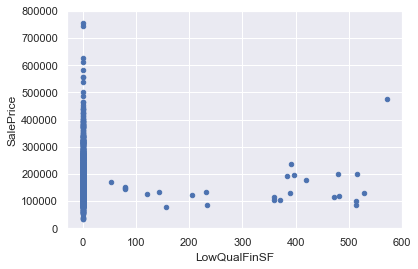

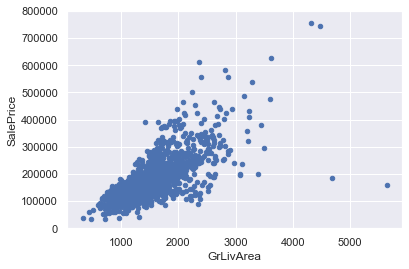

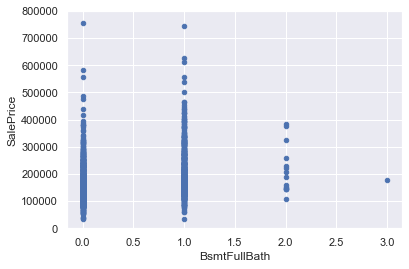

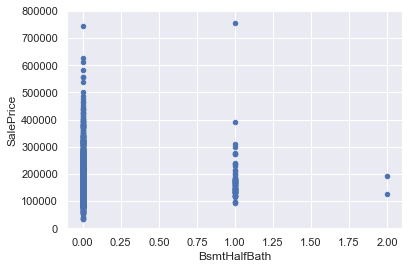

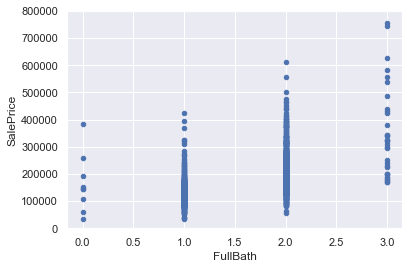

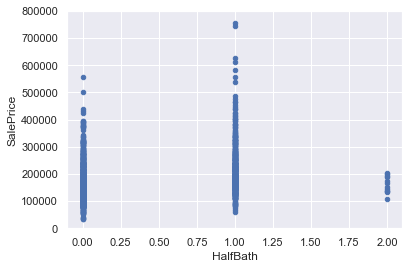

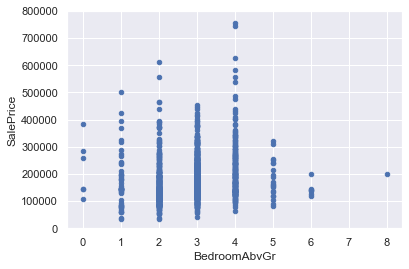

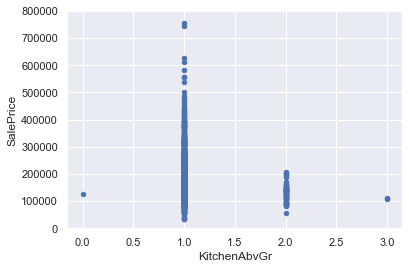

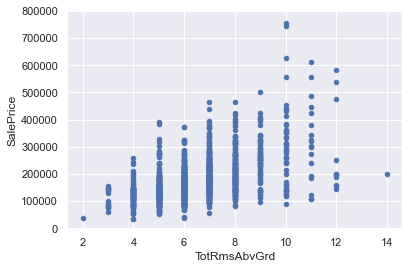

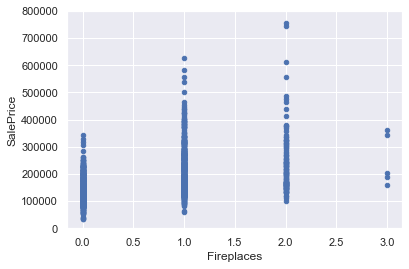

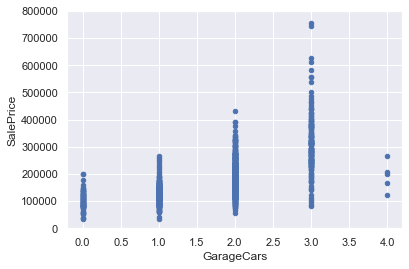

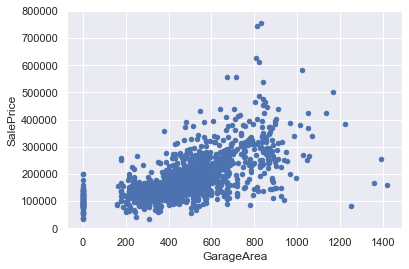

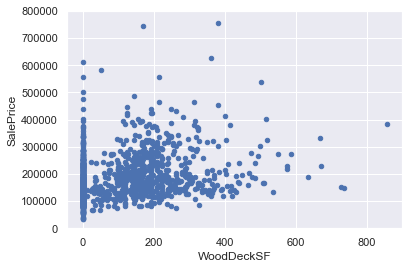

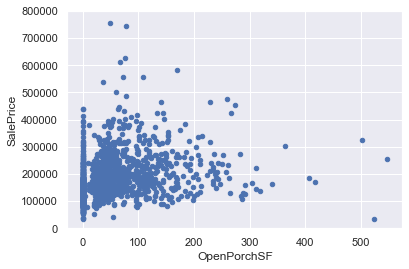

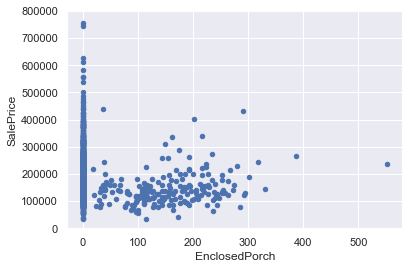

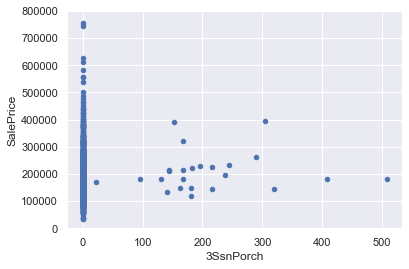

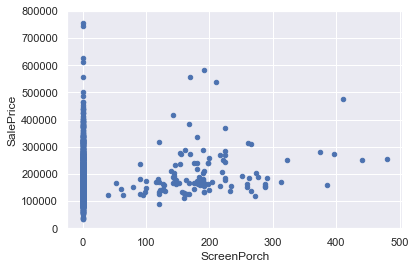

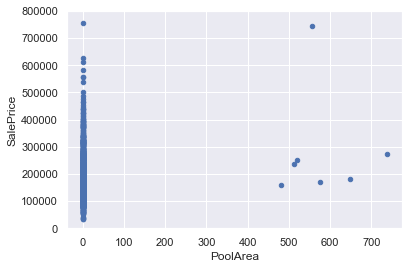

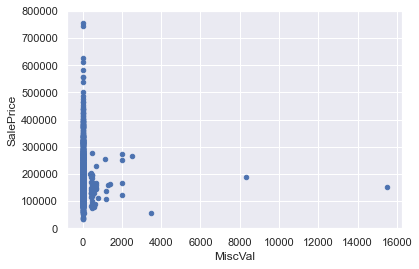

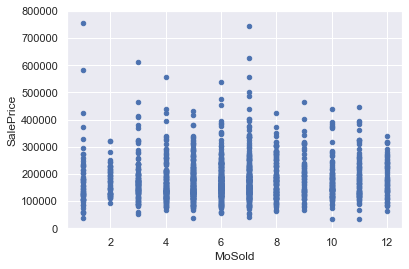

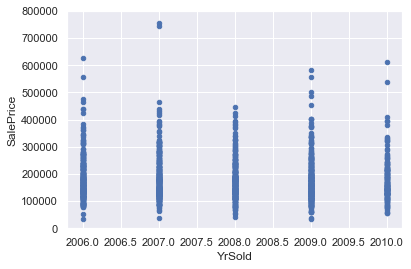

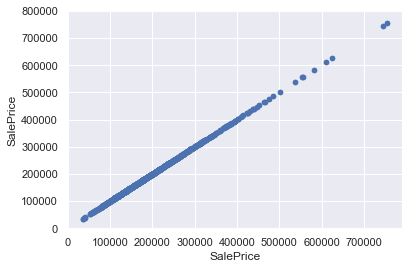

In [158]:
#Using for loop to scatter plot all of the num columns with SalePrice
for var in df_num: 
    data = pd.concat([df_num.SalePrice, df_num[var]], axis = 1)
    data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

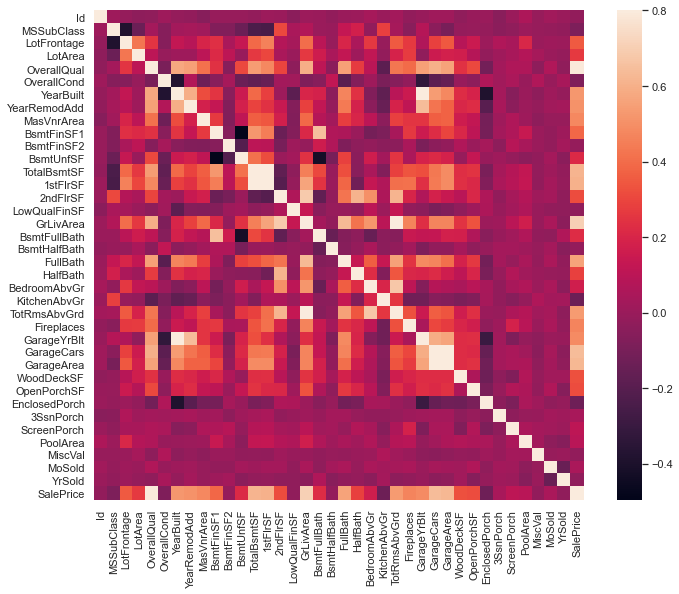

In [159]:
#Correlation Matrix
corr = df_train.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corr, vmax=0.8, square = True)

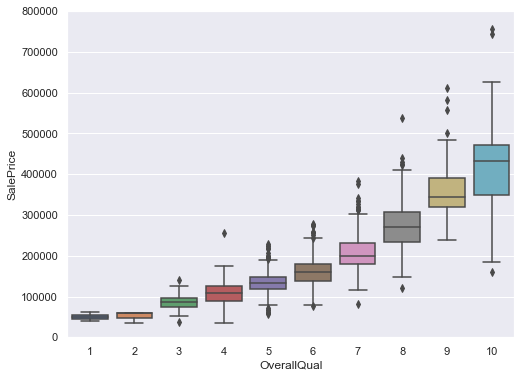

In [160]:
#Relationship with categorical features
var = 'OverallQual'
data = pd.concat([df_train.SalePrice, df_train[var]], axis = 1)
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x=var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000);

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

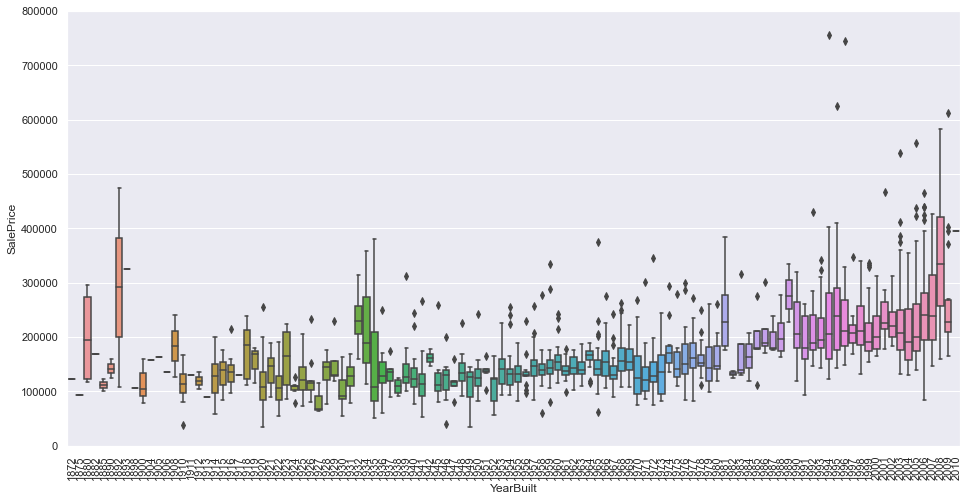

In [161]:
#Relationship with categorical features
var = 'YearBuilt'
data = pd.concat([df_train.SalePrice, df_train[var]], axis = 1)
f, ax = plt.subplots(figsize = (16,8))
fig = sns.boxplot(x=var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000);
plt.xticks(rotation = 90)

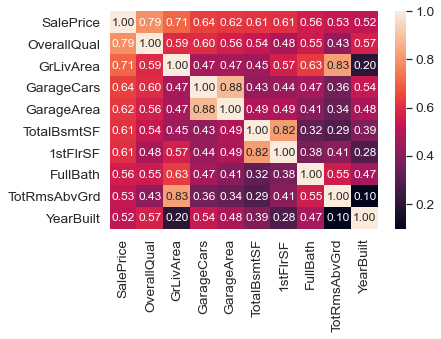

In [162]:
#Better correlation matrix
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt = '.2f', annot_kws={'size': 12}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

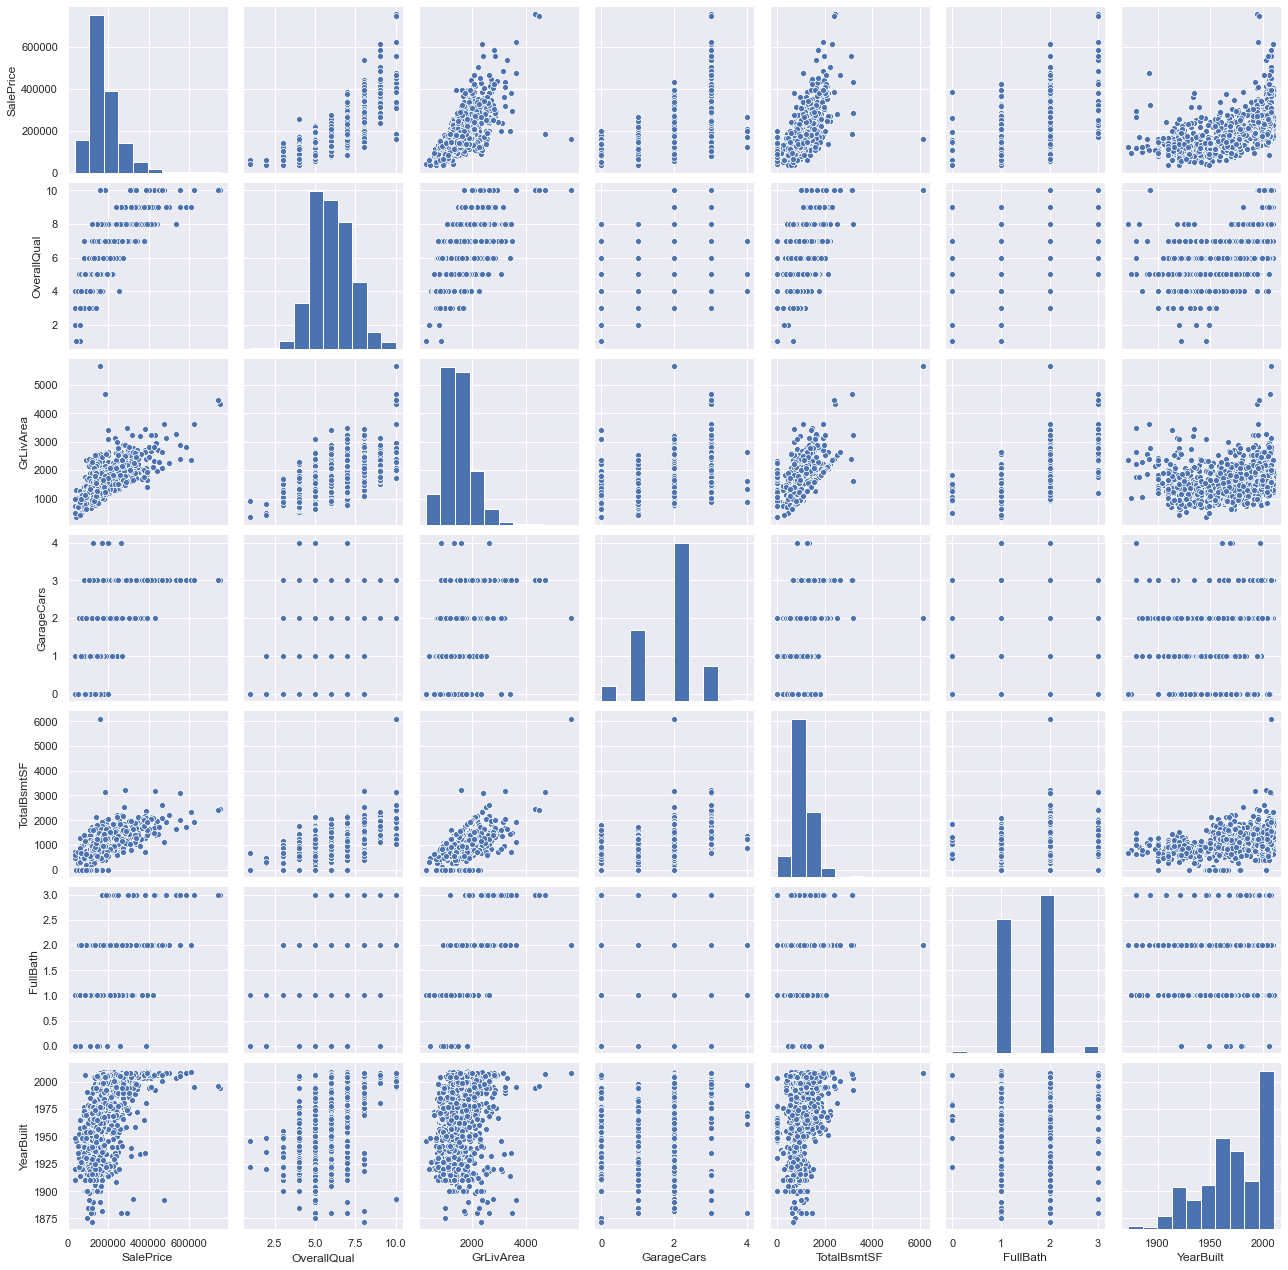

In [163]:
#More scatter plots
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

In [164]:
#missing data
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [165]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, 1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

In [166]:
#time to standardize
saleprice_scaled = StandardScaler().fit_transform(df_train.SalePrice[:, np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution: \n' + str(low_range))
print('outer range (high) of the distribution: \n' + str(high_range))

outer range (low) of the distribution: 
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
outer range (high) of the distribution: 
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


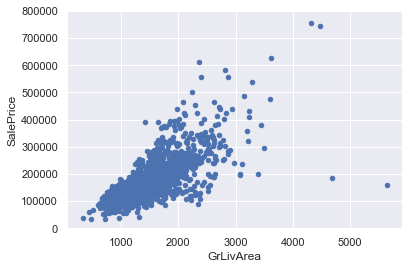

In [167]:
#Bivariate analysis
var = 'GrLivArea'
data = pd.concat([df_train.SalePrice, df_train[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
#we notice the 4 outlier and decide to keep the top two but delete bottom two

In [169]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

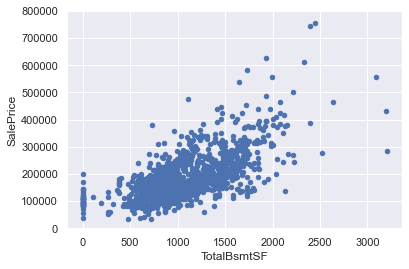

In [170]:
#Checking the other
var = 'TotalBsmtSF'
data = pd.concat([df_train.SalePrice, df_train[var]], axis = 1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
#the outliers are chillin so we won't delete them

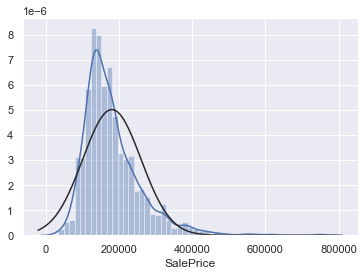

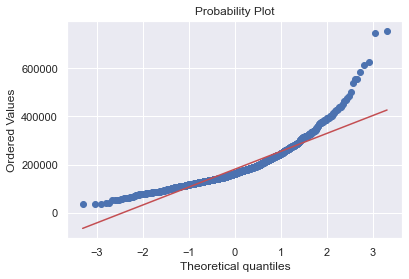

In [175]:
#histogram and prob plot
sns.distplot(df_train['SalePrice'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

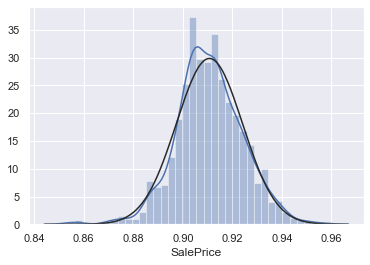

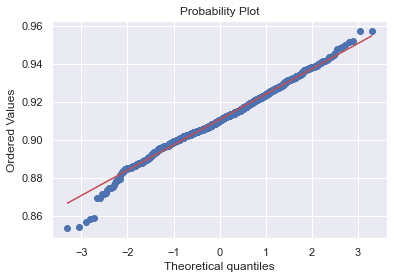

In [178]:
#log transformations should fix postitive skewdness
df_train['SalePrice'] = np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

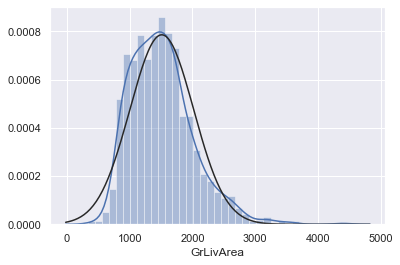

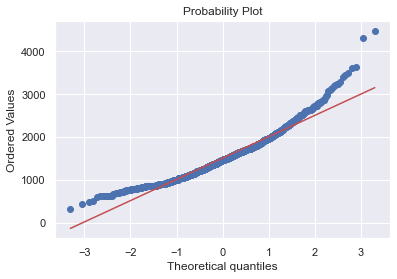

In [179]:
#same shit with GrLivArea
sns.distplot(df_train['GrLivArea'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

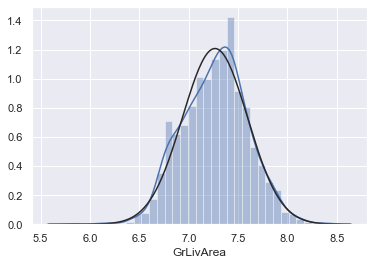

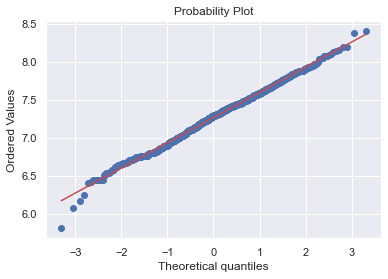

In [180]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
sns.distplot(df_train['GrLivArea'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

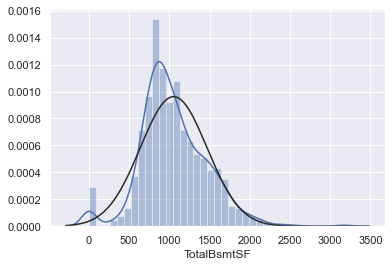

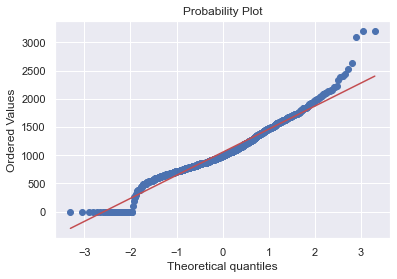

In [181]:
sns.distplot(df_train['TotalBsmtSF'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot = plt)

In [184]:
#creating a new column to say whether a house has a basement or not, cause you can't log a zero
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index = df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF']>0, 'HasBsmt'] = 1

In [188]:
#transform data
df_train.loc[df_train['HasBsmt']==1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

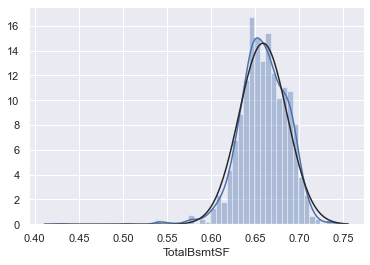

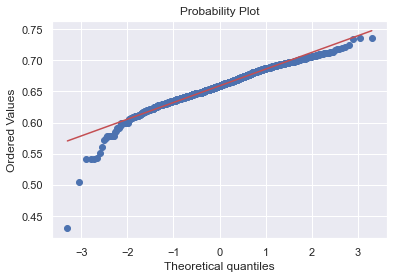

In [195]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot = plt)

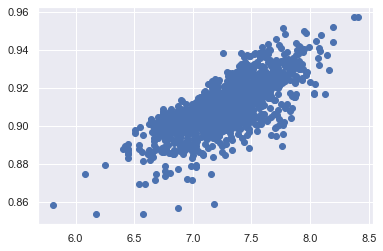

In [196]:
#Looking for Homoscedasticity
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

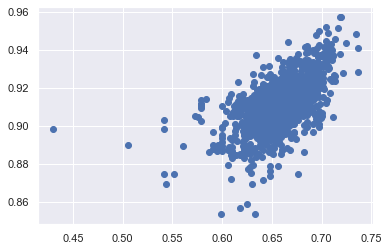

In [197]:
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In [200]:
#dummy variables
df_train = pd.get_dummies(df_train)